In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt



In [3]:
# read data
#df = pd.read_csv("../Data/Hotel_Reviews.csv")

In [4]:
#df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [8]:
#del df

In [2]:
df = pd.read_csv("../Data/Hotel_Reviews.csv", parse_dates=['Review_Date'], index_col='Review_Date')

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 515738 entries, 2017-08-03 to 2015-08-09
Data columns (total 16 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Average_Score                               515738 non-null  float64
 3   Hotel_Name                                  515738 non-null  object 
 4   Reviewer_Nationality                        515738 non-null  object 
 5   Negative_Review                             515738 non-null  object 
 6   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 7   Total_Number_of_Reviews                     515738 non-null  int64  
 8   Positive_Review                             515738 non-null  object 
 9   Review_Total_Positive_Word_Counts           515738 non

In [4]:
df.index

DatetimeIndex(['2017-08-03', '2017-08-03', '2017-07-31', '2017-07-31',
               '2017-07-24', '2017-07-24', '2017-07-17', '2017-07-17',
               '2017-07-09', '2017-07-08',
               ...
               '2015-09-27', '2015-09-26', '2015-09-20', '2015-09-07',
               '2015-09-06', '2015-08-30', '2015-08-22', '2015-08-19',
               '2015-08-17', '2015-08-09'],
              dtype='datetime64[ns]', name='Review_Date', length=515738, freq=None)

In [5]:
"""
# simple try for taking all the hotels as one

# Load your dataset (assuming it has a "Reviewer_Score" column and a datetime index)
# df = pd.read_csv('your_data.csv', parse_dates=['Date'], index_col='Date')

# Example DataFrame
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=500, freq="D")
scores = np.random.uniform(5, 10, size=500)
df = pd.DataFrame({"Reviewer_Score": scores}, index=dates)

# Ensure the data is sorted by date
df = df.sort_index()

# Create rolling average features
rolling_windows = [7, 14, 30]
for window in rolling_windows:
    df[f"rolling_avg_{window}"] = df["Reviewer_Score"].rolling(window=window, min_periods=1).mean()

# Drop rows with NaN values if needed
df = df.dropna()

# Splitting the dataset
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Prepare features and target
X_train = train_data.drop(columns=["Reviewer_Score"])
y_train = train_data["Reviewer_Score"]
X_test = test_data.drop(columns=["Reviewer_Score"])
y_test = test_data["Reviewer_Score"]

# Train XGBoost regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)

# Forecast and evaluate
y_pred = xgb.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plot actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Forecasted", linestyle="dashed")
plt.legend()
plt.title("Actual vs Forecasted Reviewer Scores")
#plt.xlabel("Date")
plt.xlabel("Review_Date")
plt.ylabel("Reviewer Score")
plt.show()
"""

'\n# simple try for taking all the hotels as one\n\n# Load your dataset (assuming it has a "Reviewer_Score" column and a datetime index)\n# df = pd.read_csv(\'your_data.csv\', parse_dates=[\'Date\'], index_col=\'Date\')\n\n# Example DataFrame\nnp.random.seed(42)\ndates = pd.date_range(start="2020-01-01", periods=500, freq="D")\nscores = np.random.uniform(5, 10, size=500)\ndf = pd.DataFrame({"Reviewer_Score": scores}, index=dates)\n\n# Ensure the data is sorted by date\ndf = df.sort_index()\n\n# Create rolling average features\nrolling_windows = [7, 14, 30]\nfor window in rolling_windows:\n    df[f"rolling_avg_{window}"] = df["Reviewer_Score"].rolling(window=window, min_periods=1).mean()\n\n# Drop rows with NaN values if needed\ndf = df.dropna()\n\n# Splitting the dataset\ntrain_size = int(len(df) * 0.8)\ntrain_data, test_data = df.iloc[:train_size], df.iloc[train_size:]\n\n# Prepare features and target\nX_train = train_data.drop(columns=["Reviewer_Score"])\ny_train = train_data["Review

In [6]:
"""# this would calculate for all the hotels at once, but we only need for one at a time

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Simulating or loading your dataset (replace this with your actual data)
# Ensure 'Hotel_Name' and 'Reviewer_Score' columns are present
data = pd.DataFrame({
    'Hotel_Name': np.random.choice(['Hotel_A', 'Hotel_B', 'Hotel_C'], 1000),  # Random hotel names
    'Reviewer_Score': np.random.uniform(1, 10, 1000),  # Random scores
    'Date': pd.date_range(start='2020-01-01', periods=1000)  # Date column
})

# Set 'Date' as the index
data.set_index('Date', inplace=True)

# Define a function to process data for each hotel
def forecast_for_hotel(hotel_data):
    # Generate rolling average features
    window_sizes = [3, 7, 14]  # Example rolling window sizes in days
    for window in window_sizes:
        hotel_data[f'Rolling_Mean_{window}'] = hotel_data['Reviewer_Score'].rolling(window=window).mean()
    
    # Drop rows with NaN values generated by rolling averages
    hotel_data.dropna(inplace=True)

    # Splitting data into train and test sets (80% train, 20% test)
    train_size = int(0.8 * len(hotel_data))
    train_data = hotel_data.iloc[:train_size]
    test_data = hotel_data.iloc[train_size:]

    # Define features and target
    X_train = train_data.drop(columns=['Reviewer_Score'])
    y_train = train_data['Reviewer_Score']
    X_test = test_data.drop(columns=['Reviewer_Score'])
    y_test = test_data['Reviewer_Score']

    # Train the XGBoost Regressor
    xgb_model = XGBRegressor(enable_categorical=True, objective='reg:squarederror', n_estimators=100, learning_rate=0.1)
    xgb_model.fit(X_train, y_train)

    # Forecast the scores for the test set
    y_pred = xgb_model.predict(X_test)

    # Evaluate model performance
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Combine actual vs predicted for comparison
    results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    
    return {
        'MSE': mse,
        'R2': r2,
        'Results': results
    }

# Group by 'Hotel_Name' and apply the forecast function
forecast_results = {}
for hotel_name, group in data.groupby('Hotel_Name'):
    print(f"Processing data for {hotel_name}...")
    forecast_results[hotel_name] = forecast_for_hotel(group)

# Display summary of results
for hotel_name, result in forecast_results.items():
    print(f"Hotel: {hotel_name}")
    print("Mean Squared Error:", result['MSE'])
    print("R^2 Score:", result['R2'])
    print(result['Results'].head())
    print("\n")
"""

'# this would calculate for all the hotels at once, but we only need for one at a time\n\nimport pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom xgboost import XGBRegressor\nfrom sklearn.metrics import mean_squared_error, r2_score\n\n# Simulating or loading your dataset (replace this with your actual data)\n# Ensure \'Hotel_Name\' and \'Reviewer_Score\' columns are present\ndata = pd.DataFrame({\n    \'Hotel_Name\': np.random.choice([\'Hotel_A\', \'Hotel_B\', \'Hotel_C\'], 1000),  # Random hotel names\n    \'Reviewer_Score\': np.random.uniform(1, 10, 1000),  # Random scores\n    \'Date\': pd.date_range(start=\'2020-01-01\', periods=1000)  # Date column\n})\n\n# Set \'Date\' as the index\ndata.set_index(\'Date\', inplace=True)\n\n# Define a function to process data for each hotel\ndef forecast_for_hotel(hotel_data):\n    # Generate rolling average features\n    window_sizes = [3, 7, 14]  # Example rolling window sizes in days\n    for window 

In [7]:
print(len(df["Hotel_Name"].unique()))
print(len(df["Hotel_Address"].unique()))

1492
1493


In [8]:
df_one_hotel = df[df["Hotel_Address"]==" s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands"]

In [9]:
df_one_hotel

,Hotel_Address,Additional_Number_of_Scoring,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
Review_Date,,,,,,,,,,,,,,,,
2017-08-03,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2017-08-03,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2017-07-31,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
2017-07-31,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
2017-07-24,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-08-17,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,United Kingdom,Expensive to get to from the train station ai...,10,1403,Lovely location helpful staff The bikes avail...,15,7,8.8,"[' Leisure trip ', ' Couple ', ' Large King Ro...",717 day,52.360576,4.915968
2015-08-16,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,Norway,Doors to the bathroom,5,1403,EVERYTHING,3,2,10.0,"[' Leisure trip ', ' Group ', ' Duplex Double ...",718 day,52.360576,4.915968
2015-08-09,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7.7,Hotel Arena,United Kingdom,No Negative,0,1403,Room was bright and airy and staff were most ...,12,6,8.8,"[' Leisure trip ', ' Couple ', ' Duplex Double...",725 day,52.360576,4.915968


In [34]:
print(len(df_one_hotel["Hotel_Name"].unique()))

1


In [10]:
"""# Example DataFrame
np.random.seed(42)
dates = pd.date_range(start="2020-01-01", periods=500, freq="D")
scores = np.random.uniform(5, 10, size=500)
df_simulated = pd.DataFrame({"Reviewer_Score": scores}, index=dates)
df_simulated
"""

'# Example DataFrame\nnp.random.seed(42)\ndates = pd.date_range(start="2020-01-01", periods=500, freq="D")\nscores = np.random.uniform(5, 10, size=500)\ndf_simulated = pd.DataFrame({"Reviewer_Score": scores}, index=dates)\ndf_simulated\n'

In [46]:
df = df_one_hotel[["Reviewer_Score"]]
df

,Reviewer_Score
Review_Date,
2017-08-03,2.9
2017-08-03,7.5
2017-07-31,7.1
2017-07-31,3.8
2017-07-24,6.7
...,...
2015-08-17,8.8
2015-08-16,10.0
2015-08-09,8.8


In [47]:
df = df.sort_index()
print(df)
print(type(df))

             Reviewer_Score
Review_Date                
2015-08-04              9.2
2015-08-04              6.7
2015-08-04              9.2
2015-08-06              8.8
2015-08-09              8.8
...                     ...
2017-07-31              7.5
2017-07-31              9.6
2017-07-31              3.8
2017-08-03              7.5
2017-08-03              2.9

[405 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>


In [48]:
#In general, we have more than one score for each day, so we need to aggregate them
df = df.groupby(["Review_Date"])[["Reviewer_Score"]].mean()
#df = df.set_index(["Review_Date"])
df

,Reviewer_Score
Review_Date,
2015-08-04,8.366667
2015-08-06,8.800000
2015-08-09,8.800000
2015-08-11,9.600000
2015-08-14,9.600000
...,...
2017-07-19,9.600000
2017-07-22,7.500000
2017-07-24,6.700000


             Reviewer_Score  rolling_avg_7  rolling_avg_14  rolling_avg_30
Review_Date                                                               
2015-08-04         8.366667       8.366667        8.366667        8.366667
2015-08-06         8.800000       8.583333        8.583333        8.583333
2015-08-09         8.800000       8.655556        8.655556        8.655556
2015-08-11         9.600000       8.891667        8.891667        8.891667
2015-08-14         9.600000       9.033333        9.033333        9.033333
...                     ...            ...             ...             ...
2017-07-19         9.600000       8.142857        8.039286        7.650000
2017-07-22         7.500000       7.785714        8.010714        7.656667
2017-07-24         6.700000       7.614286        7.775000        7.691667
2017-07-31         7.000000       7.685714        7.767857        7.715000
2017-08-03         5.200000       7.257143        7.603571        7.581667

[297 rows x 4 columns]
M

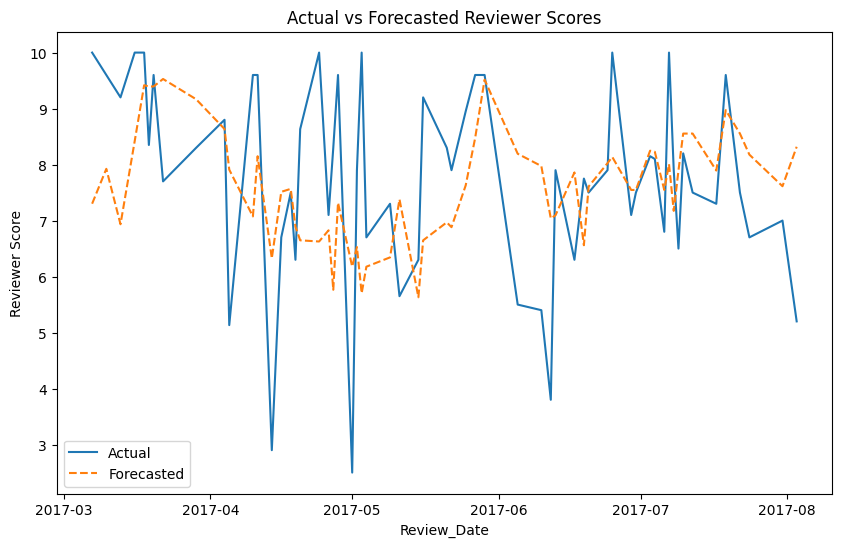

In [36]:
# Ensure the data is sorted by date
df = df.sort_index()

# Create rolling average features
rolling_windows = [7, 14, 30]
#rolling_windows = [7, 14, 30, 60, 90, 180, 365]
#rolling_windows = [30]
for window in rolling_windows:
    df[f"rolling_avg_{window}"] = df["Reviewer_Score"].rolling(window=window, min_periods=1).mean()

# Drop rows with NaN values if needed
df = df.dropna()

print(df)

# Splitting the dataset
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Prepare features and target
X_train = train_data.drop(columns=["Reviewer_Score"])
y_train = train_data["Reviewer_Score"]
X_test = test_data.drop(columns=["Reviewer_Score"])
y_test = test_data["Reviewer_Score"]

# Train XGBoost regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)

# Forecast and evaluate
y_pred = xgb.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plot actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Forecasted", linestyle="dashed")
plt.legend()
plt.title("Actual vs Forecasted Reviewer Scores")
#plt.xlabel("Date")
plt.xlabel("Review_Date")
plt.ylabel("Reviewer Score")
plt.show()

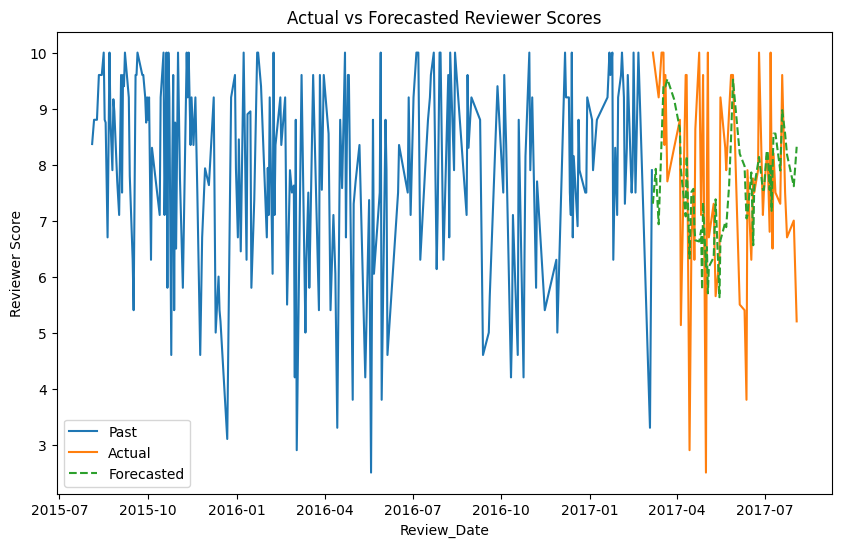

In [37]:
# Plot actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(y_train.index, y_train, label="Past")
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Forecasted", linestyle="dashed")
plt.legend()
plt.title("Actual vs Forecasted Reviewer Scores")
#plt.xlabel("Date")
plt.xlabel("Review_Date")
plt.ylabel("Reviewer Score")
plt.show()

             Reviewer_Score  rolling_avg_7  rolling_avg_14  rolling_avg_30  \
Review_Date                                                                  
2015-08-04         8.366667       8.366667        8.366667        8.366667   
2015-08-06         8.800000       8.583333        8.583333        8.583333   
2015-08-09         8.800000       8.655556        8.655556        8.655556   
2015-08-11         9.600000       8.891667        8.891667        8.891667   
2015-08-14         9.600000       9.033333        9.033333        9.033333   
...                     ...            ...             ...             ...   
2017-07-19         9.600000       8.142857        8.039286        7.650000   
2017-07-22         7.500000       7.785714        8.010714        7.656667   
2017-07-24         6.700000       7.614286        7.775000        7.691667   
2017-07-31         7.000000       7.685714        7.767857        7.715000   
2017-08-03         5.200000       7.257143        7.603571      

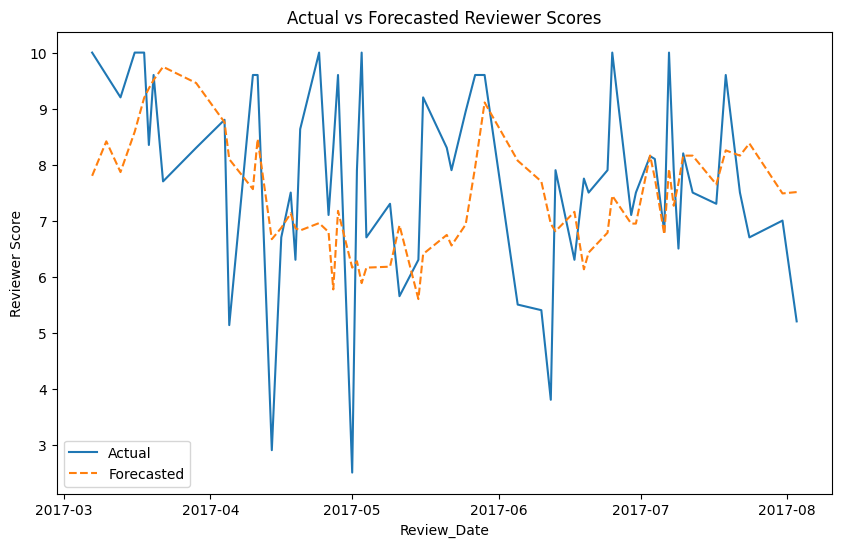

In [45]:
# Ensure the data is sorted by date
df = df.sort_index()

# Create rolling average features
#rolling_windows = [7, 14, 30]
rolling_windows = [7, 14, 30, 60, 90, 180, 365]
#rolling_windows = [30]
for window in rolling_windows:
    df[f"rolling_avg_{window}"] = df["Reviewer_Score"].rolling(window=window, min_periods=1).mean()

# Drop rows with NaN values if needed
df = df.dropna()

print(df)

# Splitting the dataset
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Prepare features and target
X_train = train_data.drop(columns=["Reviewer_Score"])
y_train = train_data["Reviewer_Score"]
X_test = test_data.drop(columns=["Reviewer_Score"])
y_test = test_data["Reviewer_Score"]

# Train XGBoost regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)

# Forecast and evaluate
y_pred = xgb.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plot actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Forecasted", linestyle="dashed")
plt.legend()
plt.title("Actual vs Forecasted Reviewer Scores")
#plt.xlabel("Date")
plt.xlabel("Review_Date")
plt.ylabel("Reviewer Score")
plt.show()

             Reviewer_Score  rolling_avg_30
Review_Date                                
2015-08-04         8.366667        8.366667
2015-08-06         8.800000        8.583333
2015-08-09         8.800000        8.655556
2015-08-11         9.600000        8.891667
2015-08-14         9.600000        9.033333
...                     ...             ...
2017-07-19         9.600000        7.650000
2017-07-22         7.500000        7.656667
2017-07-24         6.700000        7.691667
2017-07-31         7.000000        7.715000
2017-08-03         5.200000        7.581667

[297 rows x 2 columns]
Mean Squared Error: 2.5367736345542116
Mean Absolute Error: 1.2333195341957937


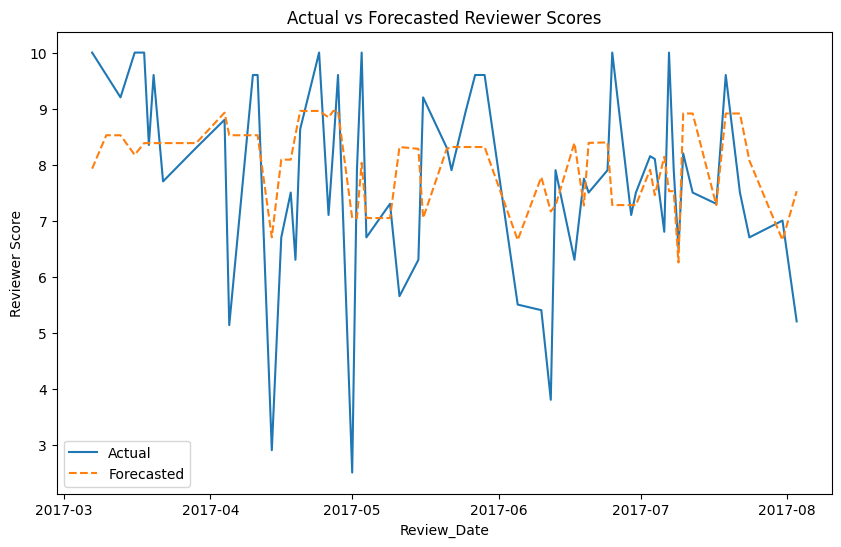

In [49]:
# Ensure the data is sorted by date
df = df.sort_index()

# Create rolling average features
#rolling_windows = [7, 14, 30]
#rolling_windows = [7, 14, 30, 60, 90, 180, 365]
rolling_windows = [30]
for window in rolling_windows:
    df[f"rolling_avg_{window}"] = df["Reviewer_Score"].rolling(window=window, min_periods=1).mean()

# Drop rows with NaN values if needed
df = df.dropna()

print(df)

# Splitting the dataset
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Prepare features and target
X_train = train_data.drop(columns=["Reviewer_Score"])
y_train = train_data["Reviewer_Score"]
X_test = test_data.drop(columns=["Reviewer_Score"])
y_test = test_data["Reviewer_Score"]

# Train XGBoost regressor
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)

# Forecast and evaluate
y_pred = xgb.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

# Plot actual vs forecasted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Forecasted", linestyle="dashed")
plt.legend()
plt.title("Actual vs Forecasted Reviewer Scores")
#plt.xlabel("Date")
plt.xlabel("Review_Date")
plt.ylabel("Reviewer Score")
plt.show()

In [50]:
train_data.index

DatetimeIndex(['2015-08-04', '2015-08-06', '2015-08-09', '2015-08-11',
               '2015-08-14', '2015-08-16', '2015-08-17', '2015-08-18',
               '2015-08-20', '2015-08-22',
               ...
               '2017-02-06', '2017-02-08', '2017-02-09', '2017-02-13',
               '2017-02-14', '2017-02-15', '2017-02-17', '2017-02-20',
               '2017-03-04', '2017-03-06'],
              dtype='datetime64[ns]', name='Review_Date', length=237, freq=None)

In [51]:
test_data.index

DatetimeIndex(['2017-03-07', '2017-03-10', '2017-03-13', '2017-03-16',
               '2017-03-18', '2017-03-19', '2017-03-20', '2017-03-22',
               '2017-03-29', '2017-04-04', '2017-04-05', '2017-04-10',
               '2017-04-11', '2017-04-14', '2017-04-16', '2017-04-18',
               '2017-04-19', '2017-04-20', '2017-04-24', '2017-04-26',
               '2017-04-27', '2017-04-28', '2017-05-01', '2017-05-02',
               '2017-05-03', '2017-05-04', '2017-05-09', '2017-05-11',
               '2017-05-15', '2017-05-16', '2017-05-21', '2017-05-22',
               '2017-05-25', '2017-05-27', '2017-05-29', '2017-06-05',
               '2017-06-10', '2017-06-12', '2017-06-13', '2017-06-17',
               '2017-06-19', '2017-06-20', '2017-06-24', '2017-06-25',
               '2017-06-29', '2017-06-30', '2017-07-03', '2017-07-04',
               '2017-07-06', '2017-07-07', '2017-07-08', '2017-07-09',
               '2017-07-10', '2017-07-12', '2017-07-17', '2017-07-19',
      